<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Customer_Churn_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
class Model(nn.Module):
  def __init__(self,in_features = 13,h1= 25,h2 = 35,h3 = 45,out_features = 2):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [114]:
torch.manual_seed(41)

model = Model()

In [115]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [117]:
df = df.drop(['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PaperlessBilling'], axis = True)
df.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [118]:
df['PhoneService'] = df['PhoneService'].replace('No', 0.0)
df['PhoneService'] = df['PhoneService'].replace('Yes', 1.0)

df['MultipleLines'] = df['MultipleLines'].replace('No', 0.0)
df['MultipleLines'] = df['MultipleLines'].replace('Yes', 1.0)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0.2)

df['OnlineSecurity'] = df['OnlineSecurity'].replace('No', 0.0)
df['OnlineSecurity'] = df['OnlineSecurity'].replace('Yes', 1.0)
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 0.2)

df['InternetService'] = df['InternetService'].replace('DSL', 0.0)
df['InternetService'] = df['InternetService'].replace('Fiber optic', 1.0)
df['InternetService'] = df['InternetService'].replace('No', 0.2)

df['OnlineBackup'] = df['OnlineBackup'].replace('No', 0.0)
df['OnlineBackup'] = df['OnlineBackup'].replace('Yes', 1.0)
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 0.2)

df['DeviceProtection'] = df['DeviceProtection'].replace('No', 0.0)
df['DeviceProtection'] = df['DeviceProtection'].replace('Yes', 1.0)
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 0.2)

df['TechSupport'] = df['TechSupport'].replace('No', 0.0)
df['TechSupport'] = df['TechSupport'].replace('Yes', 1.0)
df['TechSupport'] = df['TechSupport'].replace('No internet service', 0.2)

df['StreamingTV'] = df['StreamingTV'].replace('No', 0.0)
df['StreamingTV'] = df['StreamingTV'].replace('Yes', 1.0)
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 0.2)

df['StreamingMovies'] = df['StreamingMovies'].replace('No', 0.0)
df['StreamingMovies'] = df['StreamingMovies'].replace('Yes', 1.0)
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 0.2)

df['Contract'] = df['Contract'].replace('Month-to-month', 0.0)
df['Contract'] = df['Contract'].replace('One year', 1.0)
df['Contract'] = df['Contract'].replace('Two year', 2.0)

df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 0.0)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 1.0)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 2.0)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 3.0)

df['Churn'] = df['Churn'].replace('No', 0.0)
df['Churn'] = df['Churn'].replace('Yes', 1.0)



<ipython-input-118-662e096f76df>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PhoneService'] = df['PhoneService'].replace('Yes', 1.0)
<ipython-input-118-662e096f76df>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0.2)
<ipython-input-118-662e096f76df>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [119]:
df.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.85,29.85,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,56.95,1889.5,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,53.85,108.15,1.0
3,0.0,0.2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,42.30,1840.75,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.70,151.65,1.0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PhoneService      7043 non-null   float64
 1   MultipleLines     7043 non-null   float64
 2   InternetService   7043 non-null   float64
 3   OnlineSecurity    7043 non-null   float64
 4   OnlineBackup      7043 non-null   float64
 5   DeviceProtection  7043 non-null   float64
 6   TechSupport       7043 non-null   float64
 7   StreamingTV       7043 non-null   float64
 8   StreamingMovies   7043 non-null   float64
 9   Contract          7043 non-null   float64
 10  PaymentMethod     7043 non-null   float64
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   object 
 13  Churn             7043 non-null   float64
dtypes: float64(13), object(1)
memory usage: 770.5+ KB


In [121]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [122]:
df[['TechSupport','StreamingTV','StreamingMovies','TotalCharges']] = df[['TechSupport','StreamingTV','StreamingMovies','TotalCharges']].astype('float64')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PhoneService      7043 non-null   float64
 1   MultipleLines     7043 non-null   float64
 2   InternetService   7043 non-null   float64
 3   OnlineSecurity    7043 non-null   float64
 4   OnlineBackup      7043 non-null   float64
 5   DeviceProtection  7043 non-null   float64
 6   TechSupport       7043 non-null   float64
 7   StreamingTV       7043 non-null   float64
 8   StreamingMovies   7043 non-null   float64
 9   Contract          7043 non-null   float64
 10  PaymentMethod     7043 non-null   float64
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   float64
dtypes: float64(14)
memory usage: 770.5 KB


In [124]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [125]:
X = X.values
y = y.values


In [126]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=41)

In [127]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [128]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [129]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 22.06882095336914
Epoch: 10 Loss: 5.112751483917236
Epoch: 20 Loss: 2.0189104080200195
Epoch: 30 Loss: 1.304360032081604
Epoch: 40 Loss: 1.0510057210922241
Epoch: 50 Loss: 0.8029745221138
Epoch: 60 Loss: 0.6221544146537781
Epoch: 70 Loss: 0.580316424369812
Epoch: 80 Loss: 0.5660800337791443
Epoch: 90 Loss: 0.5590391159057617
Epoch: 100 Loss: 0.5552958846092224
Epoch: 110 Loss: 0.5517122745513916
Epoch: 120 Loss: 0.5486437678337097
Epoch: 130 Loss: 0.5457971096038818
Epoch: 140 Loss: 0.5428686738014221
Epoch: 150 Loss: 0.5397782325744629
Epoch: 160 Loss: 0.5626251697540283
Epoch: 170 Loss: 0.5443506240844727
Epoch: 180 Loss: 0.5332597494125366
Epoch: 190 Loss: 0.5284815430641174
Epoch: 200 Loss: 0.5255932807922363
Epoch: 210 Loss: 0.522615373134613
Epoch: 220 Loss: 0.5193743109703064
Epoch: 230 Loss: 0.5162283778190613
Epoch: 240 Loss: 0.5129738450050354
Epoch: 250 Loss: 0.5096304416656494
Epoch: 260 Loss: 0.5062007904052734
Epoch: 270 Loss: 0.5026825666427612
Epoch: 280 

Text(0.5, 0, 'Epoch')

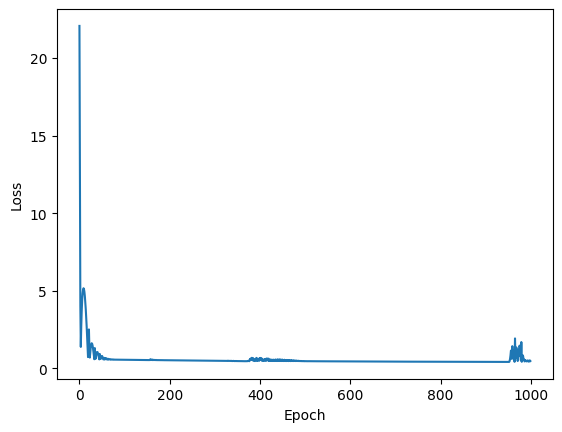

In [130]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')